In [1]:
%reset -f


In [2]:
import wbdata
import pandas as pd
import datetime

In [3]:
countries = ['PK', 'IN', 'BD']


In [36]:
indicators = {
    # Original mappings
    'NY.GDP.PCAP.KD': 'gdp_per_capita',
    'SP.URB.TOTL.IN.ZS': 'urbanization_rate',
    'NV.IND.TOTL.ZS': 'industry_share',
    'NV.AGR.TOTL.ZS': 'agriculture_share',
    'SE.SEC.ENRR': 'secondary_enrollment',
    'SE.TER.ENRR': 'tertiary_enrollment',
    'SP.POP.GROW': 'population_growth',
    'SP.POP.DPND.YG': 'youth_dependency_ratio',
    'IT.NET.USER.ZS': 'internet_penetration',
    'EG.ELC.ACCS.ZS': 'electricity_access',
    'FP.CPI.TOTL.ZG': 'inflation_rate',
    'NE.TRD.GNFS.ZS': 'trade_percent_gdp',
    'BX.KLT.DINV.WD.GD.ZS': 'fdi_inflow',
    'FS.AST.PRVT.GD.ZS': 'credit_to_private_sector',
    'BX.TRF.PWKR.DT.GD.ZS': 'remittances_percent_gdp',
    'NE.CON.GOVT.ZS': 'govt_consumption_percent_gdp',
    'NY.GNS.ICTR.ZS': 'gross_savings_percent_gdp',

    # Socio-Demographics & Human Capital
    'NV.SRV.TOTL.ZS': 'services_share',  # Services value added (% of GDP)
    'NY.ADJ.AEDU.CD': 'education_expenditure_current_usd', 
    'SP.DYN.LE00.IN': 'life_expectancy_at_birth',  # Life expectancy at birth, total (years)
    'SP.DYN.TFRT.IN': 'fertility_rate',  # Total fertility rate (births per woman)
    'SE.PRM.ENRR': 'primary_gross_enrollment_rate',  # School enrollment, primary (% gross)
    'SE.SEC.ENRR': 'secondary_gross_enrollment_rate',  # (already mapped)
    'SE.TER.ENRR': 'tertiary_gross_enrollment_rate',  # (already mapped)

    # Population & Age Composition
    'SP.POP.DPND': 'age_dependency_ratio',  # Age dependency ratio (% of working-age population)
    'SP.POP.DPND.OL': 'old_age_dependency_ratio',  # Age dependency ratio, old (% of working-age population)

    # Infrastructure & Technology
    'IT.CEL.SETS.P2': 'mobile_cellular_subscriptions_per_100',  # Mobile cellular subscriptions (per 100 people)

    # Macroeconomic & Financial
    'FR.INR.RINR': 'real_interest_rate',  # Real interest rate (%)
    'TX.QTY.MRCH.XD.WD': 'export_volume_index',  # Export volume index (2015 = 100)
    'DT.DOD.DECT.GN.ZS': 'external_debt_percent_gni',  # External debt stocks (% of GNI)
    'SE.XPD.TOTL.GD.ZS': 'govt_expenditure_on_education_percent_gdp',  # Government expenditure on education, total (% of GDP)
    'GC.TAX.TOTL.GD.ZS': 'tax_revenue_percent_gdp',  # Tax revenue (% of GDP)
    'BN.CAB.XOKA.GD.ZS': 'Current account balance (% of GDP)',  
    'FM.LBL.BMNY.GD.ZS': 'broad_money_percent_gdp',  # Broad money (% of GDP)
    'NE.GDI.TOTL.ZS': 'gross_capital_formation_percent_gdp',  # Gross capital formation (% of GDP)


    # Energy & Environment
    'EG.USE.ELEC.KH.PC': 'electricity_consumption_kwh_per_capita',  # Electric power consumption (kWh per capita)
    'EG.FEC.RNEW.ZS': 'renewable_energy_consumption_percent',  # Renewable energy consumption (% of total final energy consumption)
    'EG.USE.COMM.FO.ZS': 'fossil_fuel_energy_consumption_percent',  # Fossil fuel energy consumption (% of total)

    # Tourism & Services Trade
    'BG.GSR.NFSV.GD.ZS': 'trade_in_services_percent_gdp',  # Trade in services (% of GDP)
}


In [37]:

# ---- TEST EACH INDICATOR ----
missing_indicators = []
available_indicators = []
for name, code in indicators.items():
    try:
        df = wbdata.get_dataframe({name: code}, country=countries)
        if df.empty:
            missing_indicators.append((name, code))
        else:
            available_indicators.append((name, code))
    except Exception as e:
        # If any error occurs (including NoneType), mark as missing
        missing_indicators.append((name, code))

# ---- PRINT RESULTS ----
if available_indicators:
    print("\n✅ These indicators returned data:", [name for name, _ in available_indicators])
if missing_indicators:
    print("\n❌ These indicators have no available data or failed:", [name for name, _ in missing_indicators])



✅ These indicators returned data: ['NY.GDP.PCAP.KD', 'SP.URB.TOTL.IN.ZS', 'NV.IND.TOTL.ZS', 'NV.AGR.TOTL.ZS', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.GROW', 'SP.POP.DPND.YG', 'IT.NET.USER.ZS', 'EG.ELC.ACCS.ZS', 'FP.CPI.TOTL.ZG', 'NE.TRD.GNFS.ZS', 'BX.KLT.DINV.WD.GD.ZS', 'FS.AST.PRVT.GD.ZS', 'BX.TRF.PWKR.DT.GD.ZS', 'NE.CON.GOVT.ZS', 'NY.GNS.ICTR.ZS', 'NV.SRV.TOTL.ZS', 'NY.ADJ.AEDU.CD', 'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'SE.PRM.ENRR', 'SP.POP.DPND', 'SP.POP.DPND.OL', 'IT.CEL.SETS.P2', 'FR.INR.RINR', 'TX.QTY.MRCH.XD.WD', 'DT.DOD.DECT.GN.ZS', 'SE.XPD.TOTL.GD.ZS', 'GC.TAX.TOTL.GD.ZS', 'BN.CAB.XOKA.GD.ZS', 'FM.LBL.BMNY.GD.ZS', 'NE.GDI.TOTL.ZS', 'EG.USE.ELEC.KH.PC', 'EG.FEC.RNEW.ZS', 'EG.USE.COMM.FO.ZS', 'BG.GSR.NFSV.GD.ZS']


In [38]:
df=wbdata.get_dataframe(indicators, country=countries)


In [39]:
df = df.reset_index()
df['year'] = pd.to_datetime(df['date']).dt.year
df = df.drop(columns=['date'])


In [40]:
df = df[(df['year'] >= 1970) & (df['year'] <= 2022)]


In [41]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print(missing_data)


internet_penetration                         73
tax_revenue_percent_gdp                      72
electricity_access                           72
renewable_energy_consumption_percent         63
electricity_consumption_kwh_per_capita       60
fossil_fuel_energy_consumption_percent       60
govt_expenditure_on_education_percent_gdp    54
real_interest_rate                           49
tertiary_gross_enrollment_rate               39
primary_gross_enrollment_rate                36
secondary_gross_enrollment_rate              35
export_volume_index                          33
Current account balance (% of GDP)           17
inflation_rate                               17
remittances_percent_gdp                      17
trade_in_services_percent_gdp                17
gross_savings_percent_gdp                    17
mobile_cellular_subscriptions_per_100        12
education_expenditure_current_usd             6
credit_to_private_sector                      5
broad_money_percent_gdp                 

In [42]:
# Count non-null values for each variable by year and country
coverage = df.groupby(['country', 'year']).count()

# Check how many indicators are available for each year/country combo
coverage['available_vars'] = coverage.sum(axis=1)

# Reset index so we can view it as a table
coverage = coverage.reset_index()

# See the worst and best coverage examples
coverage.sort_values(by='available_vars', ascending=True).head(10)


,country,year,gdp_per_capita,urbanization_rate,industry_share,agriculture_share,secondary_gross_enrollment_rate,tertiary_gross_enrollment_rate,population_growth,youth_dependency_ratio,...,govt_expenditure_on_education_percent_gdp,tax_revenue_percent_gdp,Current account balance (% of GDP),broad_money_percent_gdp,gross_capital_formation_percent_gdp,electricity_consumption_kwh_per_capita,renewable_energy_consumption_percent,fossil_fuel_energy_consumption_percent,trade_in_services_percent_gdp,available_vars
1,Bangladesh,1971,1,1,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,14
2,Bangladesh,1972,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,16
0,Bangladesh,1970,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,17
3,Bangladesh,1973,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,20
4,Bangladesh,1974,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,21
5,Bangladesh,1975,1,1,1,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,21
53,India,1970,1,1,1,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,21
106,Pakistan,1970,1,1,1,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,21
55,India,1972,1,1,1,1,1,0,1,1,...,0,0,0,1,1,0,0,0,0,22
57,India,1974,1,1,1,1,0,0,1,1,...,0,1,0,1,1,0,0,0,0,22


In [49]:
# Count how many country-year rows have enough data (e.g., ≥13 indicators present)
good_rows = coverage[coverage['available_vars'] >= 27]
print(f"Number of good rows: {len(good_rows)} out of {len(coverage)} total rows")


Number of good rows: 142 out of 159 total rows


In [50]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent


internet_penetration                         45.911950
tax_revenue_percent_gdp                      45.283019
electricity_access                           45.283019
renewable_energy_consumption_percent         39.622642
electricity_consumption_kwh_per_capita       37.735849
fossil_fuel_energy_consumption_percent       37.735849
govt_expenditure_on_education_percent_gdp    33.962264
real_interest_rate                           30.817610
tertiary_gross_enrollment_rate               24.528302
primary_gross_enrollment_rate                22.641509
secondary_gross_enrollment_rate              22.012579
export_volume_index                          20.754717
Current account balance (% of GDP)           10.691824
inflation_rate                               10.691824
remittances_percent_gdp                      10.691824
trade_in_services_percent_gdp                10.691824
gross_savings_percent_gdp                    10.691824
mobile_cellular_subscriptions_per_100         7.547170
education_

In [51]:
# Create a copy of the original dataframe to preserve it
df_imputed = df.copy()

# Impute missing values with the mean of each variable within each country
df_imputed.update(df.groupby('country').transform(lambda x: x.fillna(x.mean())))


In [52]:
# Check remaining missing values after imputation
missing_after = df_imputed.isnull().sum().sort_values(ascending=False)
missing_after[missing_after > 0]


Series([], dtype: int64)

In [53]:
# Save the cleaned DataFrame to a CSV file
df_imputed.to_csv("updated_gdp_structural_data.csv", index=False)


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")


In [55]:
sns.set(style="white")  # or "ticks"


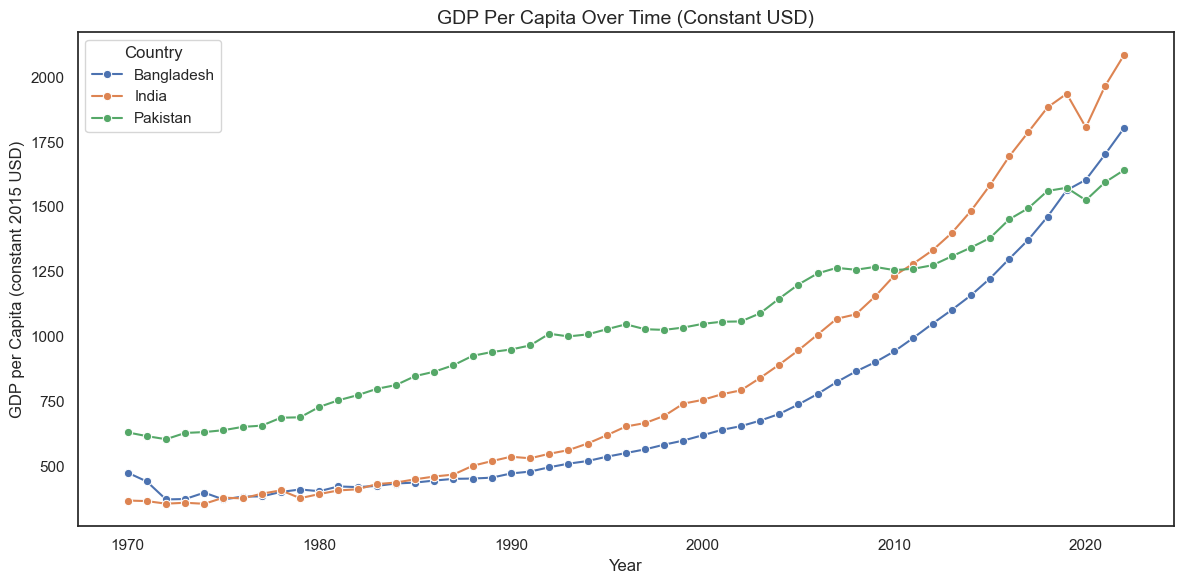

In [56]:
# Set figure size
plt.figure(figsize=(12, 6))

# Lineplot of GDP per capita over time
sns.lineplot(data=df_imputed, x="year", y="gdp_per_capita", hue="country", marker="o")

# Titles and labels
plt.title("GDP Per Capita Over Time (Constant USD)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP per Capita (constant 2015 USD)")
plt.legend(title="Country")
plt.tight_layout()

# Show the plot
plt.show()



In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set your preferred Seaborn style for publishing
sns.set(style="white")


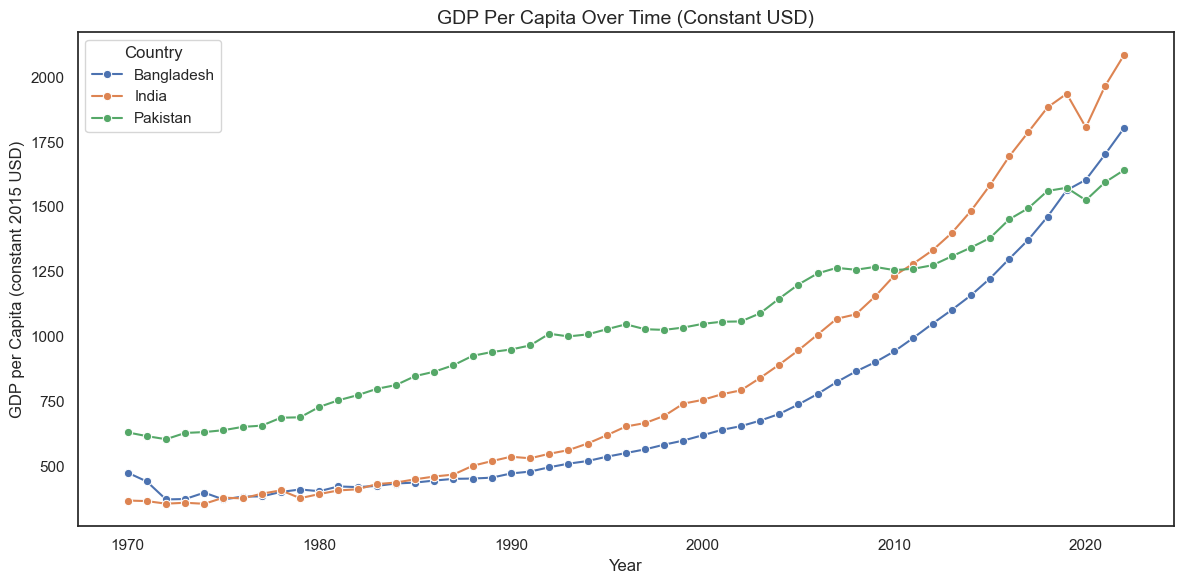

In [58]:
# Set figure size
plt.figure(figsize=(12, 6))

# Lineplot of GDP per capita over time
sns.lineplot(data=df_imputed, x="year", y="gdp_per_capita", hue="country", marker="o")

# Titles and labels
plt.title("GDP Per Capita Over Time (Constant USD)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP per Capita (constant 2015 USD)")
plt.legend(title="Country")
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
df_imputed = df.copy()


In [60]:
import wbdata
import pandas as pd
from datetime import datetime

# Define countries and date range
countries = ["PAK", "IND", "BGD"]
start_date = datetime(1970, 1, 1)
end_date = datetime(2022, 1, 1)

# Download data
df = wbdata.get_dataframe(indicators, country=countries)

# Reset index for easier handling
df = df.reset_index()

# Filter relevant years
df = df[(df['date'] >= 1970) & (df['date'] <= 2022)]
df.rename(columns={'date': 'year'}, inplace=True)


TypeError: '>=' not supported between instances of 'str' and 'int'

In [61]:
df_imputed = df.copy()


In [62]:
df.describe()

,gdp_per_capita,urbanization_rate,industry_share,agriculture_share,secondary_gross_enrollment_rate,tertiary_gross_enrollment_rate,population_growth,youth_dependency_ratio,internet_penetration,electricity_access,...,external_debt_percent_gni,govt_expenditure_on_education_percent_gdp,tax_revenue_percent_gdp,Current account balance (% of GDP),broad_money_percent_gdp,gross_capital_formation_percent_gdp,electricity_consumption_kwh_per_capita,renewable_energy_consumption_percent,fossil_fuel_energy_consumption_percent,trade_in_services_percent_gdp
count,192.000000,192.000000,192.000000,192.000000,126.000000,123.000000,189.000000,192.000000,88.000000,90.000000,...,159.000000,107.000000,87.000000,145.000000,176.000000,192.000000,99.000000,96.000000,99.000000,145.000000
mean,819.733907,25.677964,21.991022,28.939142,39.901525,9.755920,2.158207,69.873884,9.582741,69.303423,...,28.460509,2.378582,9.758519,-1.555225,42.435781,20.960699,399.972657,46.565625,64.973838,5.994047
std,448.511738,8.372805,5.568340,11.774570,19.834041,8.242411,0.728481,13.439063,12.166471,24.171994,...,12.469485,0.873442,1.930653,2.051370,16.792807,7.478762,229.372397,10.438379,8.761610,2.950377
min,312.777848,5.135000,6.064102,11.003690,15.092020,1.847020,0.790201,36.837194,0.000000,9.905419,...,6.139897,0.937600,6.611160,-7.741944,8.353728,4.697696,46.007605,25.000000,44.720000,1.924416
25%,449.745091,20.984750,19.939069,21.350350,20.516577,4.352335,1.631421,61.778779,0.190250,54.771148,...,19.488768,1.859522,8.516791,-2.741528,29.348882,15.955101,275.453091,39.150000,59.035000,3.861515
50%,655.014034,26.503000,21.706546,25.538130,36.693928,6.090470,2.250363,73.147691,5.080000,74.500000,...,25.194947,2.132700,9.306540,-1.439488,42.986163,18.903946,379.597777,47.100000,63.940000,5.262897
75%,1073.561739,32.156000,26.187064,34.283481,51.802981,12.371085,2.735875,81.809125,13.575000,89.525000,...,36.136996,2.644810,11.011738,-0.250074,50.869464,26.152734,495.266378,51.925000,72.890000,6.926508
max,2236.312793,40.473000,34.594272,61.954139,81.177861,33.116524,4.178102,86.736557,55.900000,99.600000,...,72.435410,4.635141,13.708046,3.935733,87.676673,41.950798,1074.843588,73.100000,83.130000,14.498876
